In [1]:
# Data management
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})
import matplotlib.ticker as plticker
import matplotlib.dates as md
import itertools
import matplotlib.ticker as ticker

## Article stats

In [2]:
articles = pd.read_csv('review.csv', usecols=[1,4]) 
articles.Year = pd.to_datetime(articles.Year.astype('int'), format='%Y').dt.year
articles.columns = ['Discovery year', 'Active onions']
articles['Active onions'] = articles['Active onions'].astype('float64')
display(articles)

,Discovery year,Active onions
0,2012,6579.0
1,2012,1171.0
2,2013,1450.0
3,2014,12000.0
4,2014,13337.0
5,2015,1000.0
6,2015,13145.0
7,2015,1974.0
8,2015,4857.0
9,2015,3399.0


## Effectiveness of discovery

In [3]:
onions = pd.read_csv('hidserv-dir-onions-seen.csv') 
onions['year'] = pd.to_datetime(onions.date, format='%d/%m/%Y').dt.year
onions.sample()

,date,onions,frac,year
1193,25/03/2018,67719.0,0.873465,2018


In [4]:
onions.dropna(inplace=True)
onions.sample(5)

,date,onions,frac,year
1209,10/04/2018,68052.0,0.889506,2018
1893,23/02/2020,75140.0,0.969786,2020
1319,29/07/2018,96520.0,0.907221,2018
219,25/07/2015,29147.0,0.018928,2015
2117,04/10/2020,171802.0,0.975483,2020


In [5]:
existing = onions.groupby('year').agg({'onions':'mean'})
display(existing)

,onions
year,
2014,28296.142857
2015,29235.840000
2016,55523.262295
2017,54791.613699
2018,92405.073973
2019,82129.860274
2020,150729.707650
2021,160543.372263


In [6]:
articles['Existing onions'] = articles['Discovery year'].map(existing.onions.to_dict())
articles.sample(10)

,Discovery year,Active onions,Existing onions
33,2019,9084.0,82129.860274
15,2016,7931.0,55523.262295
18,2016,5295.0,55523.262295
0,2012,6579.0,NaN
38,2020,4000.0,150729.707650
5,2015,1000.0,29235.840000
23,2017,13604.0,54791.613699
30,2018,6227.0,92405.073973
2,2013,1450.0,NaN
13,2016,1714.0,55523.262295


In [7]:
articles['TOR area'] = round(articles['Active onions'] / articles['Existing onions']*100,2)
articles.sample(10)

,Discovery year,Active onions,Existing onions,TOR area
38,2020,4000.0,150729.707650,2.65
7,2015,1974.0,29235.840000,6.75
32,2018,3900.0,92405.073973,4.22
8,2015,4857.0,29235.840000,16.61
3,2014,12000.0,28296.142857,42.41
1,2012,1171.0,NaN,NaN
34,2019,46562.0,82129.860274,56.69
18,2016,5295.0,55523.262295,9.54
33,2019,9084.0,82129.860274,11.06
30,2018,6227.0,92405.073973,6.74


In [8]:
data = pd.concat([onions.groupby('year').agg({'onions':'mean'}),articles.groupby('Discovery year').agg({'Active onions':['mean','max']})],axis=1)
data.columns = ['Total onions', 'Average discovered onions', 'Max discovered onions']
data.dropna(inplace=True)
data.reset_index(inplace=True)
data['index']=data['index'].astype('category')
display(data)

,index,Total onions,Average discovered onions,Max discovered onions
0,2014,28296.142857,12668.500000,13337.0
1,2015,29235.840000,4312.500000,13145.0
2,2016,55523.262295,7373.333333,23585.0
3,2017,54791.613699,12486.125000,29473.0
4,2018,92405.073973,14790.200000,53466.0
5,2019,82129.860274,18714.000000,46562.0
6,2020,150729.707650,21523.333333,48174.0


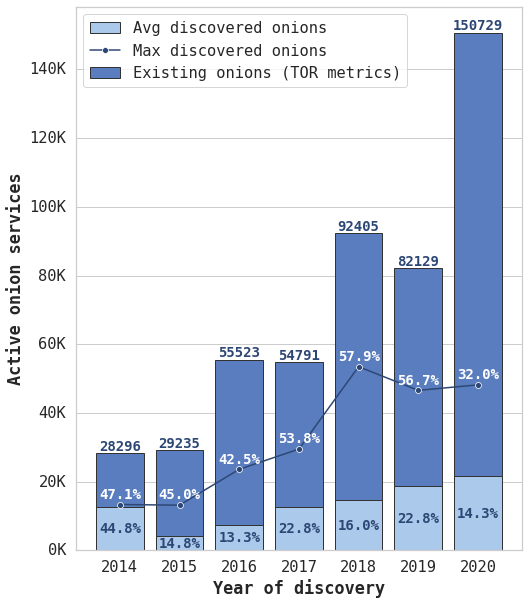

In [9]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,10))

sns.set_color_codes("muted")
sns.barplot(y="Total onions",
            x='index',
            data=data,
            order=data.sort_values(by='index', ascending=True)['index'],
            label="Existing onions (TOR metrics)",
            color="b",
            linewidth=1,
            edgecolor=".2")

sns.set_color_codes("pastel")
sns.barplot(y="Average discovered onions",
            x='index',
            order=data.sort_values(by='index', ascending=True)['index'],
            data=data,
            label="Avg discovered onions",
            color="b",
            linewidth=1,
            edgecolor=".2")

sns.lineplot(data=data['Max discovered onions'], linestyle='', marker='o', label='Max discovered onions', color='#2D4775')


# Add a legend and informative axis label
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[0], handles[1]]
labels = [labels[2], labels[0], labels[1]]
ax.legend(handles, labels)

ax.set_xlabel('Year of discovery', weight='bold')
ax.set_ylabel('Active onion services', weight='bold')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))


for pos, row in data.iterrows():
    ax.annotate(f"{int(row['Total onions'])}", (pos, row['Total onions']+4000),
                 color='#2D4775', va='top', ha='center', fontsize=14, weight='bold')
    ax.annotate(f"{round(100*round(row['Average discovered onions']/row['Total onions'],4), 1)}%", (pos, row['Average discovered onions']/2+2000),
                 color='#2D4775', va='top', ha='center', fontsize=14, weight='bold')
    ax.annotate(f"{round(100*round(row['Max discovered onions']/row['Total onions'],4), 1)}%", (pos, row['Max discovered onions']+5000),
                 color='white', va='top', ha='center', fontsize=14, weight='bold')
    
for label in ax.yaxis.get_majorticklabels():
    label.set_verticalalignment('center')

#sns.despine(left=True, bottom=True)


plt.savefig('numbers.pdf',transparent=True)

## TOR area

In [10]:
articles.groupby('Discovery year').agg({'TOR area':['mean','max']})

TOR area       
                     mean    max
Discovery year                  
2012                  NaN    NaN
2013                  NaN    NaN
2014            44.770000  47.13
2015            14.750000  44.96
2016            13.278889  42.48
2017            22.788750  53.79
2018            16.004000  57.86
2019            22.783333  56.69
2020            14.276667  31.96